In [1]:
# Supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.random.seed(0)

# 1. Fibonacci Data

In [3]:
from fibonacci import fibonacci_data

# Reading trainig data
train = fibonacci_data(1000)
X_train = train.iloc[:, [0, 1]].values
y_train = train.iloc[:, 2].values

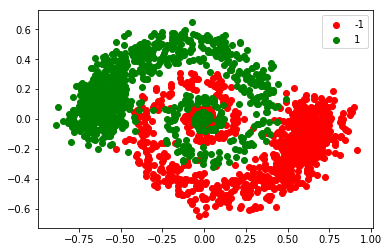

In [4]:
# Visualizing the Fibonacci data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

### 1.1 Training the Classifier 

In [5]:
# Defining and training the classifier with train data
from classifier import Classifier

cl = Classifier(kernel = 'rbf', sigma = 0.01)
cl.fit(X_train, y_train)

In [6]:
# Reading the test data
test = fibonacci_data(1000)
X_test = test.iloc[:, [0, 1]].values
y_test = test.iloc[:, 2].values

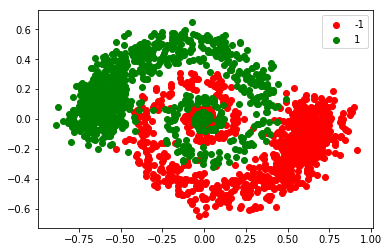

In [7]:
# Visualizing the Fibonacci Test data
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

### 1.2 Evaluating the Model

In [8]:
# Making the prediction for test data
y_pred = cl.predict(X_test)
accuracy, precision = cl.evaluate(y_test)
print('The accuracy of the model is %.2f'%accuracy)
print('The precision of the model is %.2f'%precision)

The accuracy of the model is 0.97
The precision of the model is 0.98


*** While training the classifier, we randomly select 'rbf' kernel and sigma = 0.01. However, we do not know whether these are the optimal selection or not. Hence, lets's select range of values for these hyperparameters and find the model that produces least classification error. Also, the above accuracy is obtained through one iteration. So this may not represent the actual accuracy since this could vary when we run the same model more often. So we will also cross validate the model using K-fold cross validation technique in following section. ***

### 1.3 Grid Search and Cross validation

In [9]:
from grid_search import GridSearch

parameters = [
    {'kernel': ['linear']},
    {'kernel': ['rbf'], 'sigma': [0.005, 0.01, 0.015, 0.02]}
]
grid_search = GridSearch(param_grid = parameters,
                         k = 5, # numbers of folds for cross validation
                         measure = 'accuracy' # performance measuring metric
                        )
best_score, best_classifier = grid_search.fit(X_train, y_train)

In [10]:
print(best_score)
print(best_classifier.kernel)
print(best_classifier.sigma)

0.8952
rbf
0.005


*** Here we observed that the best model is obtained with 'rbf - kernel' and sigma = 0.005 ***

### 1.4 Deploying the Best Model

In [11]:
y_pred = best_classifier.predict(X_test)

### 1.5 Visualizing the Final Result

In [12]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.02))
Z = best_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = np.asarray(Z).reshape(X1.shape)

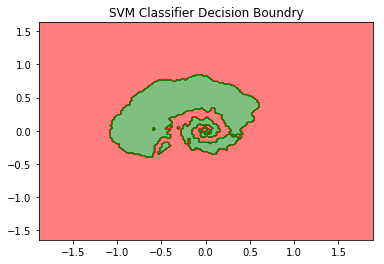

In [13]:
# Visualizing Decision boundry
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVM Classifier Decision Boundry')
plt.show()

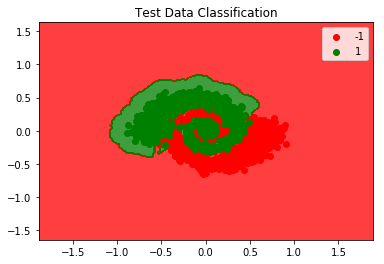

In [15]:
# Visualizing the classification result
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Test Data Classification')
plt.legend()
plt.show()

# 2. XOR Data

In [16]:
from xor import xor_data
import numpy as np
np.random.seed(0)

train = xor_data(400)
X_train = train.iloc[:, [0, 1]].values
y_train = train.iloc[:, 2].values

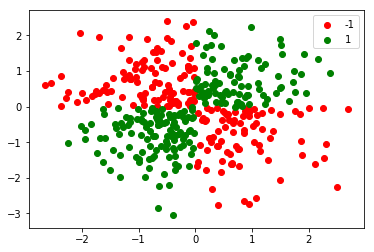

In [17]:
# Visualizing the XOR data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

### 2.1 Training the Classifier 

*** Here we are trying to find the best possible combination of hyperparameters and a classification model associated witht hise hyperparameters.***

In [18]:
from grid_search import GridSearch

parameters = [
    {'kernel': ['linear']},
    {'kernel': ['rbf'], 'sigma': [0.005, 0.01, 0.015, 0.02]}
]
grid_search = GridSearch(param_grid = parameters,
                         k = 5, # numbers of folds for cross validation
                         measure = 'accuracy' # performance measuring metric
                        )
best_score, best_classifier = grid_search.fit(X_train, y_train)

In [19]:
print(best_score)
print(best_classifier.kernel)
print(best_classifier.sigma)

0.964
rbf
0.015


In [20]:
test = xor_data(400)
X_test = test.iloc[:, [0, 1]].values
y_test = test.iloc[:, 2].values

### 2.2 Deploying the Best Model

In [21]:
y_pred = best_classifier.predict(X_test)

### 2.3 Visualizing the Final Result

In [22]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.02))
Z = best_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = np.asarray(Z).reshape(X1.shape)

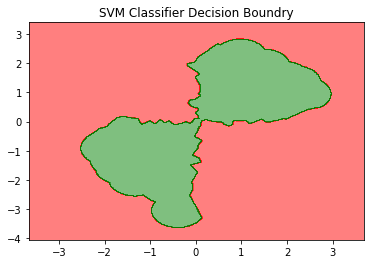

In [23]:
# Visualizing Decision boundry
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVM Classifier Decision Boundry')
plt.show()

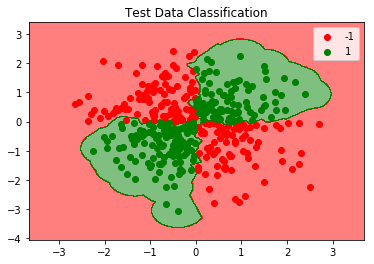

In [24]:
# Visualizing the classification result
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Test Data Classification')
plt.legend()
plt.show()